### Loading the Dataset and Viewing the Data

In [1]:
import pandas as pd
import numpy as np

# Load dataset
file_path = 'Bird_Migration_Data_with_Origin.csv'  # Change if different
df = pd.read_csv(file_path)

# Display first 5 rows
print("🔹 First 5 rows:")
print(df.head())

# Basic info
print("\n🔹 Dataset Info:")
df.info()

# Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Summary statistics
print("\n🔹 Summary Stats:")
print(df.describe(include='all').T)


🔹 First 5 rows:
  Bird_ID  Species         Region    Habitat Weather_Condition  \
0   B1000  Warbler  South America  Grassland            Stormy   
1   B1001    Stork  North America  Grassland            Stormy   
2   B1002     Hawk  South America   Mountain            Stormy   
3   B1003  Warbler  South America      Urban            Stormy   
4   B1004    Crane         Europe      Urban             Windy   

  Migration_Reason  Start_Latitude  Start_Longitude  End_Latitude  \
0          Feeding       11.906566      -169.378251     30.377647   
1         Breeding       62.301546      -111.475069     39.921092   
2  Avoid Predators       87.861164       -78.727327     66.990980   
3   Climate Change       35.770590       153.104341    -49.003145   
4  Avoid Predators      -21.611614       106.674824     11.681051   

   End_Longitude  ...  Migration_Interrupted  Interrupted_Reason  \
0     -21.366879  ...                    Yes               Storm   
1      47.963436  ...               

### Data Cleaning

In [2]:
# 1. Check missing values
print("\n🔍 Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


🔍 Missing values per column:
Interrupted_Reason         1981
Bird_ID                       0
Tracking_Quality              0
Migration_Start_Month         0
Migration_End_Month           0
Rest_Stops                    0
Predator_Sightings            0
Tag_Type                      0
Migrated_in_Flock             0
Flock_Size                    0
Food_Supply_Level             0
Migration_Interrupted         0
Species                       0
Tagged_By                     0
Tag_Weight_g                  0
Migration_Success             0
Recovery_Location_Known       0
Recovery_Time_days            0
Observation_Counts            0
Observation_Quality           0
Signal_Strength_dB            0
Tag_Battery_Level_%           0
Nesting_Success               0
Visibility_km                 0
Region                        0
Habitat                       0
Weather_Condition             0
Migration_Reason              0
Start_Latitude                0
Start_Longitude               0
End_Latitu

In [7]:
# 1. Show all unique reasons and their counts (including NaNs)
print("🔹 Interrupted_Reason value counts (including NaNs):")
print(df['Interrupted_Reason'].value_counts(dropna=False))

# 2. Show just the non-null reasons sorted by frequency
print("\n🔹 Non-null Interrupted_Reason counts:")
print(df['Interrupted_Reason'].value_counts())

🔹 Interrupted_Reason value counts (including NaNs):
Interrupted_Reason
Storm              2059
Injury             2023
Predator           1994
Lost Signal        1943
NaN                1001
Not Interrupted     980
Name: count, dtype: int64

🔹 Non-null Interrupted_Reason counts:
Interrupted_Reason
Storm              2059
Injury             2023
Predator           1994
Lost Signal        1943
Not Interrupted     980
Name: count, dtype: int64


In [8]:
# Replace missing Interrupted_Reason values with "Unknown"
df['Interrupted_Reason'] = df['Interrupted_Reason'].fillna('Unknown')

# 1. Check missing values
print("\n🔍 Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))
# 2. Show just the non-null reasons sorted by frequency
print("\n🔹 Non-null Interrupted_Reason counts:")
print(df['Interrupted_Reason'].value_counts())



🔍 Missing values per column:
Bird_ID                    0
Tracking_Quality           0
Migration_Start_Month      0
Migration_End_Month        0
Rest_Stops                 0
Predator_Sightings         0
Tag_Type                   0
Migrated_in_Flock          0
Flock_Size                 0
Food_Supply_Level          0
Migration_Interrupted      0
Species                    0
Interrupted_Reason         0
Tagged_By                  0
Tag_Weight_g               0
Migration_Success          0
Recovery_Location_Known    0
Recovery_Time_days         0
Observation_Counts         0
Observation_Quality        0
Signal_Strength_dB         0
Tag_Battery_Level_%        0
Nesting_Success            0
Visibility_km              0
Region                     0
Habitat                    0
Weather_Condition          0
Migration_Reason           0
Start_Latitude             0
Start_Longitude            0
End_Latitude               0
End_Longitude              0
Flight_Distance_km         0
Flight_Durati

In [9]:
# 3. Convert categorical columns to 'category' dtype
categorical_cols = [
    'Species', 'Region', 'Habitat', 'Weather_Condition',
    'Migration_Reason', 'Migration_Start_Month', 'Migration_End_Month',
    'Nesting_Success', 'Tag_Type', 'Migrated_in_Flock',
    'Tracking_Quality', 'Migration_Interrupted', 'Migration_Success',
    'Recovery_Location_Known'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# 4. Convert Migration_Start_Month and Migration_End_Month to ordered category
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month_col in ['Migration_Start_Month', 'Migration_End_Month']:
    if month_col in df.columns:
        df[month_col] = pd.Categorical(df[month_col], categories=month_order, ordered=True)

# 5. Show data types after conversion
print("\n✅ Updated column types:")
print(df.dtypes)



✅ Updated column types:
Bird_ID                      object
Species                    category
Region                     category
Habitat                    category
Weather_Condition          category
Migration_Reason           category
Start_Latitude              float64
Start_Longitude             float64
End_Latitude                float64
End_Longitude               float64
Flight_Distance_km          float64
Flight_Duration_hours       float64
Average_Speed_kmph          float64
Max_Altitude_m                int64
Min_Altitude_m                int64
Temperature_C               float64
Wind_Speed_kmph             float64
Humidity_%                    int64
Pressure_hPa                float64
Visibility_km               float64
Nesting_Success            category
Tag_Battery_Level_%           int64
Signal_Strength_dB          float64
Migration_Start_Month      category
Migration_End_Month        category
Rest_Stops                    int64
Predator_Sightings            int64
Tag

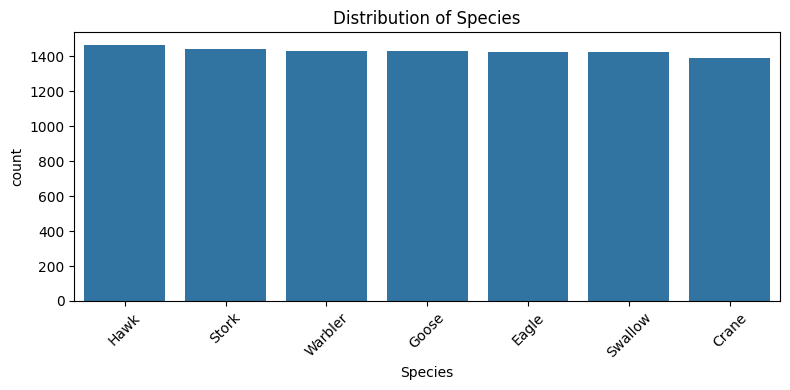

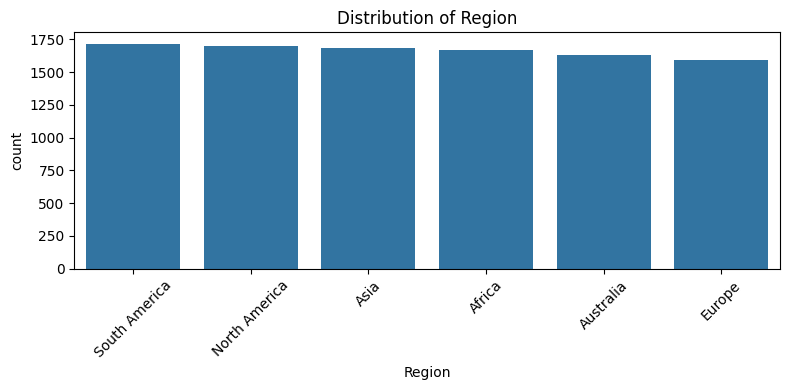

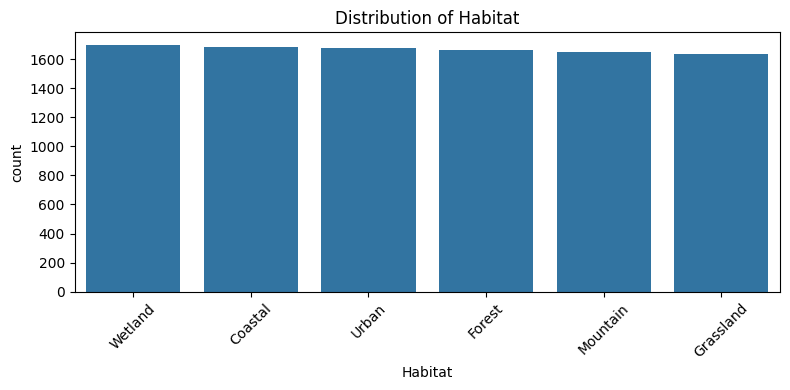

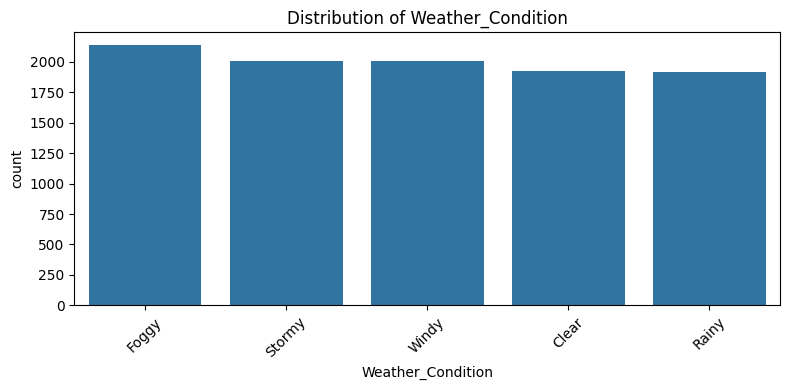

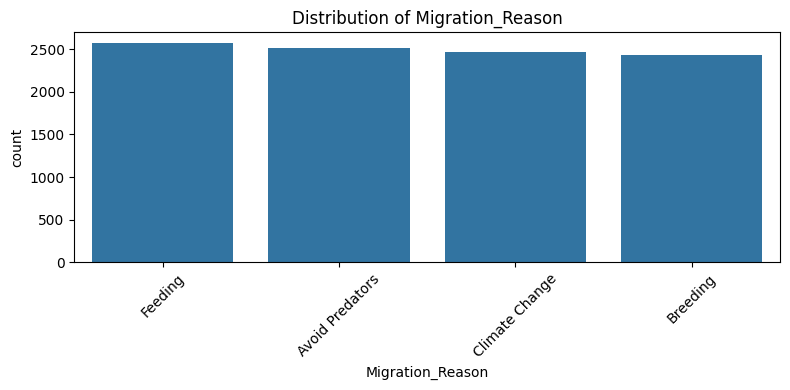

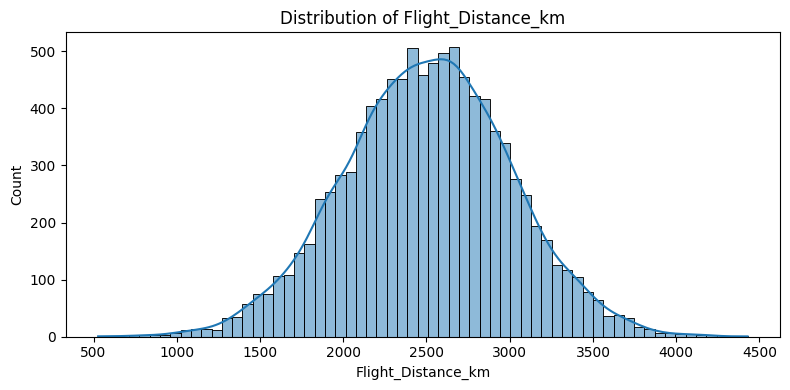

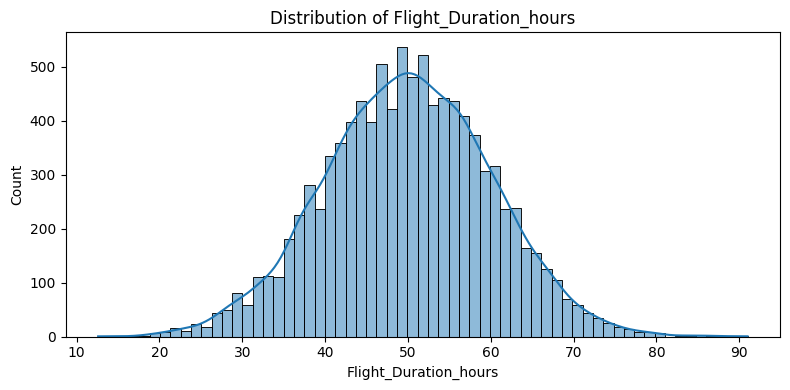

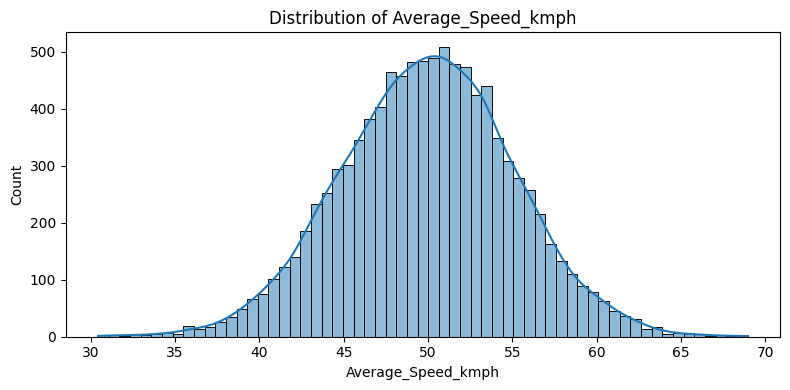

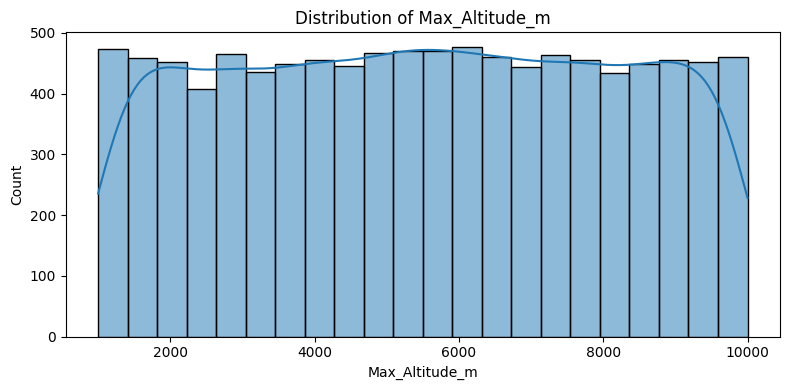

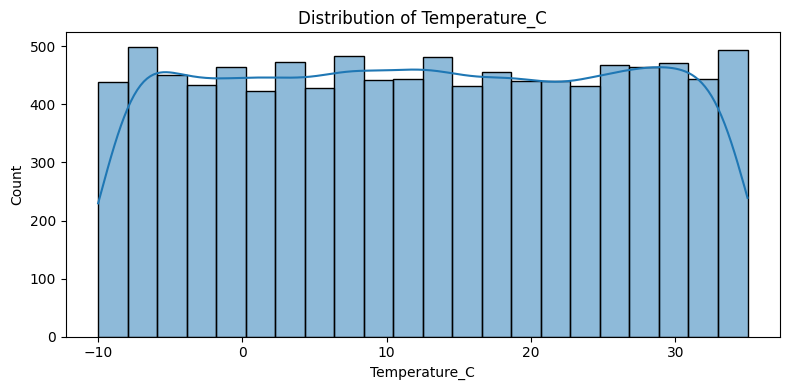

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1.1 Categorical feature distributions
cat_cols = ['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, 
                  order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3.1.2 Numerical feature distributions
num_cols = ['Flight_Distance_km', 'Flight_Duration_hours', 
            'Average_Speed_kmph', 'Max_Altitude_m', 'Temperature_C']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


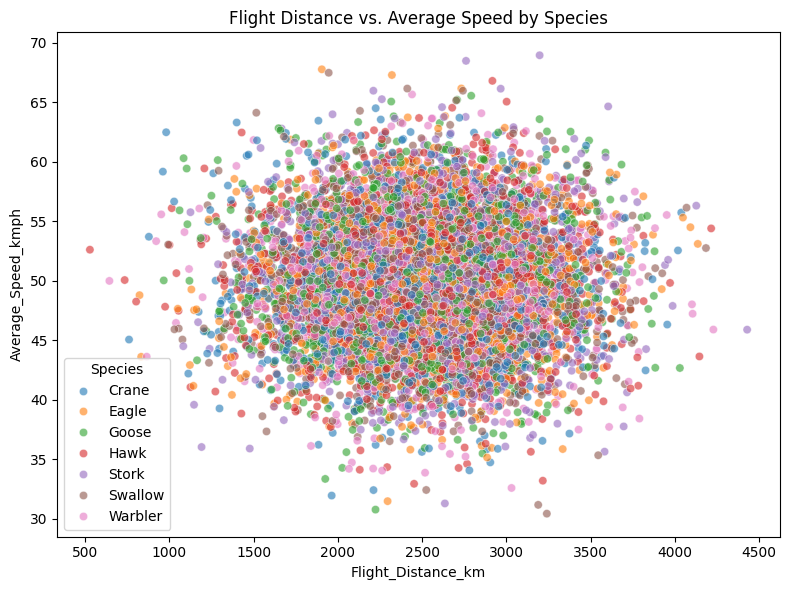

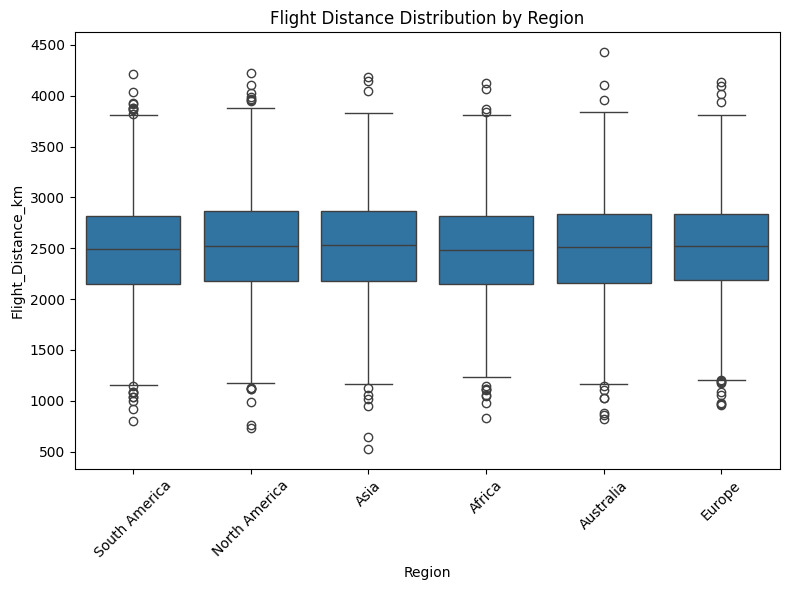

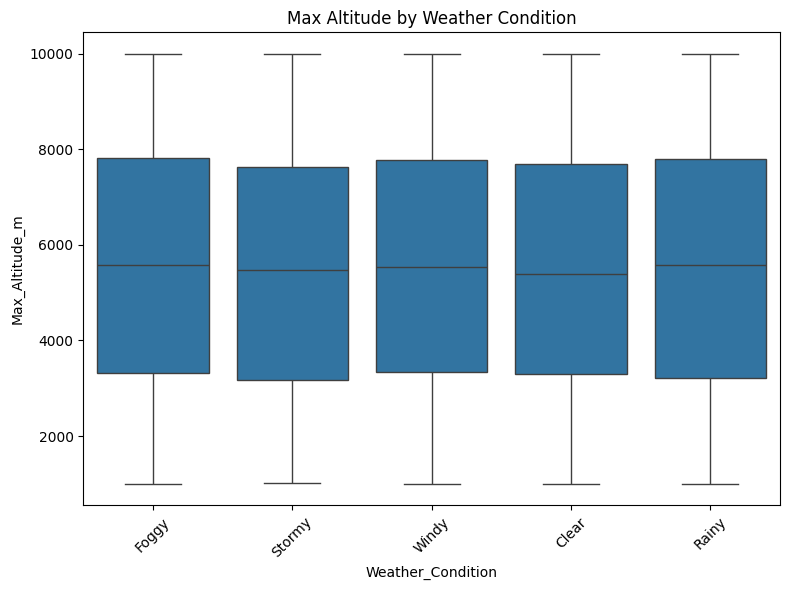

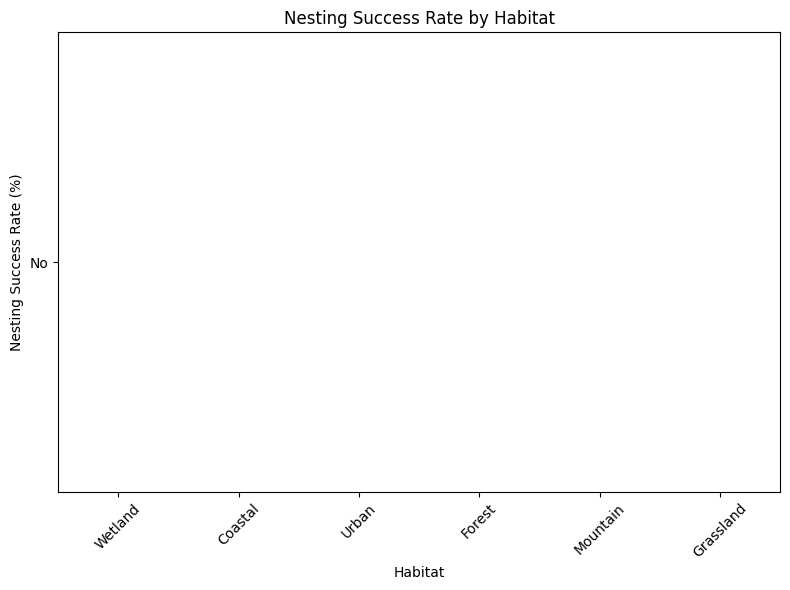

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Flight Distance vs. Average Speed (scatterplot, colored by Species)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Flight_Distance_km',
    y='Average_Speed_kmph',
    hue='Species',
    alpha=0.6
)
plt.title('Flight Distance vs. Average Speed by Species')
plt.tight_layout()
plt.show()

# 2. Boxplot of Flight Distance by Region
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Region',
    y='Flight_Distance_km',
    order=df['Region'].value_counts().index
)
plt.title('Flight Distance Distribution by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Boxplot of Max Altitude by Weather Condition
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Weather_Condition',
    y='Max_Altitude_m',
    order=df['Weather_Condition'].value_counts().index
)
plt.title('Max Altitude by Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

